#Data analyses project by using python

#####    working on Dataset contains information about 10k+ movies collected from TMDb


#####the essential Python libraries for data analysis:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

##1. Data Overview

######1.1. Understanding the Structure

In [4]:
df = pd.read_csv('/content/sample_data/tmdb-movies.csv')

In [5]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (10866, 21)


In [6]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


######1.2. Handling Missing Values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


In [9]:
# Drop columns with too many missing values
df.drop(columns=['homepage','tagline','imdb_id','budget_adj','revenue_adj'], inplace=True)

In [10]:
print(df.shape)
print("Column names and data types:")
print(df.dtypes)

(10866, 16)
Column names and data types:
id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object


In [11]:
# Drop rows with missing values in critical columns
df.dropna(subset=['id','cast','director','overview','genres','production_companies'], inplace=True)

In [12]:
df.shape
df.isnull()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#2. Financial Performance Analysis

####2.1 Profit Calculation

In [13]:
df['profit'] = df['revenue'] - df['budget']

####2.2 Top 10 Profitable Movies

In [14]:
top_10_movies = df[['original_title', 'profit']].sort_values(by='profit', ascending=False).head(10)

print("Top 10 Most Profitable Movies:")
print(top_10_movies)

Top 10 Most Profitable Movies:
                                    original_title      profit
1386                                        Avatar  2544505847
3                     Star Wars: The Force Awakens  1868178225
5231                                       Titanic  1645034188
0                                   Jurassic World  1363528810
4                                        Furious 7  1316249360
4361                                  The Avengers  1299557910
3374  Harry Potter and the Deathly Hallows: Part 2  1202817822
14                         Avengers: Age of Ultron  1125035767
5422                                        Frozen  1124219009
8094                                       The Net  1084279658


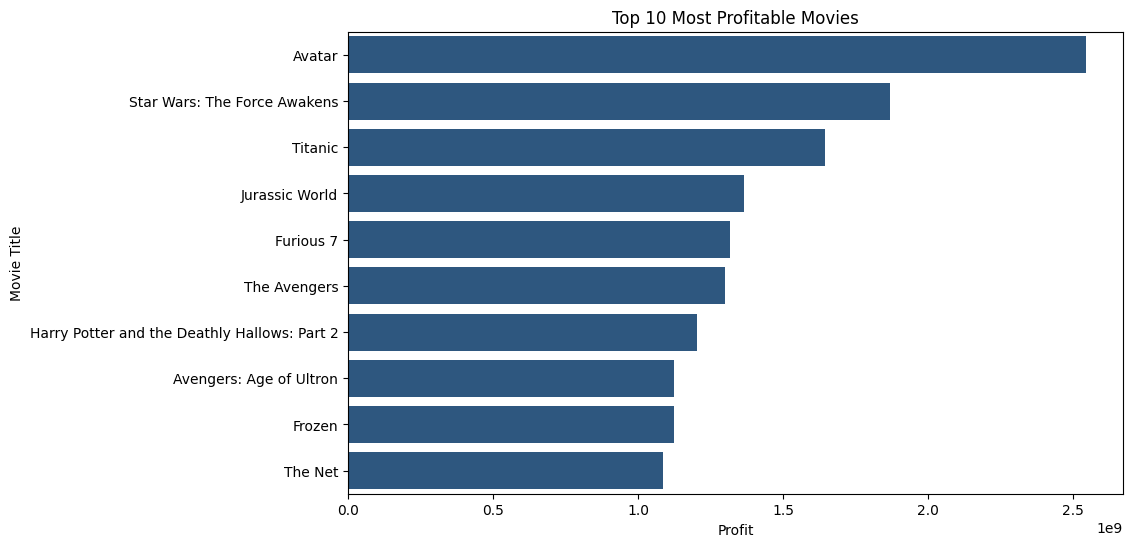

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='original_title', data=top_10_movies, )
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Profitable Movies')

plt.show()

######2.3 The return on investment (ROI) by Genre

In [ ]:
# 1-Split the genres into lists
df['genres_list'] = df['genres'].apply(lambda x: x.split('|'))

In [ ]:
# 2-Explode genres to have one genre per row
df_exploded = df.explode('genres_list')

In [ ]:
# 3-Calculate ROI
df_exploded['roi'] = (df_exploded['revenue'] - df_exploded['budget']) / df_exploded['budget']

In [ ]:
# 4-Calculate mean ROI by genre
roi_by_genre = df_exploded.groupby('genres_list')['roi'].mean().sort_values(ascending=False)

print("ROI by Genre:")
print(roi_by_genre)

ROI by Genre:
genres_list
Action                  inf
Adventure               inf
War                     inf
Thriller                inf
Science Fiction         inf
Romance                 inf
Mystery                 inf
Music                   inf
Horror                  inf
History                 inf
Foreign                 inf
Fantasy                 inf
Family                  inf
Drama                   inf
Documentary             inf
Crime                   inf
Comedy                  inf
Animation               inf
Western                 inf
TV Movie          -0.066667
Name: roi, dtype: float64


In [ ]:
df['keywords_list'] = df['keywords'].apply(lambda x: x.split('|') if pd.notnull(x) else [])

In [ ]:
df_exploded_keywords = df.explode('keywords_list')

In [ ]:
all_keywords = df['keywords_list'].explode().tolist()                 # Combine all keyword lists into one big list

keyword_counts = Counter(all_keywords)                              # Count occurrences

# Convert to a DataFrame for easier analysis
keyword_counts_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)

print(keyword_counts_df)

               keyword  count
51      woman director    413
820   independent film    396
10      based on novel    278
179                sex    272
85               sport    216
...                ...    ...
4921               NaN      1
4919               NaN      1
4918               NaN      1
4916               NaN      1
9370      stealing car      1

[9371 rows x 2 columns]


In [ ]:
keyword_to_filter = 'space'
df_filtered = df[df['keywords_list'].apply(lambda x: keyword_to_filter in x)]


In [ ]:
#Creating a Keyword Matrix:
mlb = MultiLabelBinarizer()
keyword_matrix = mlb.fit_transform(df['keywords_list'])
keyword_df = pd.DataFrame(keyword_matrix, columns=mlb.classes_, index=df.index)
df = df.join(keyword_df, rsuffix='_keyword')

In [ ]:
keyword_df.columns = ['keyword_' + col if col in df.columns else col for col in keyword_df.columns]
# Now join the DataFrame
df = df.join(keyword_df)

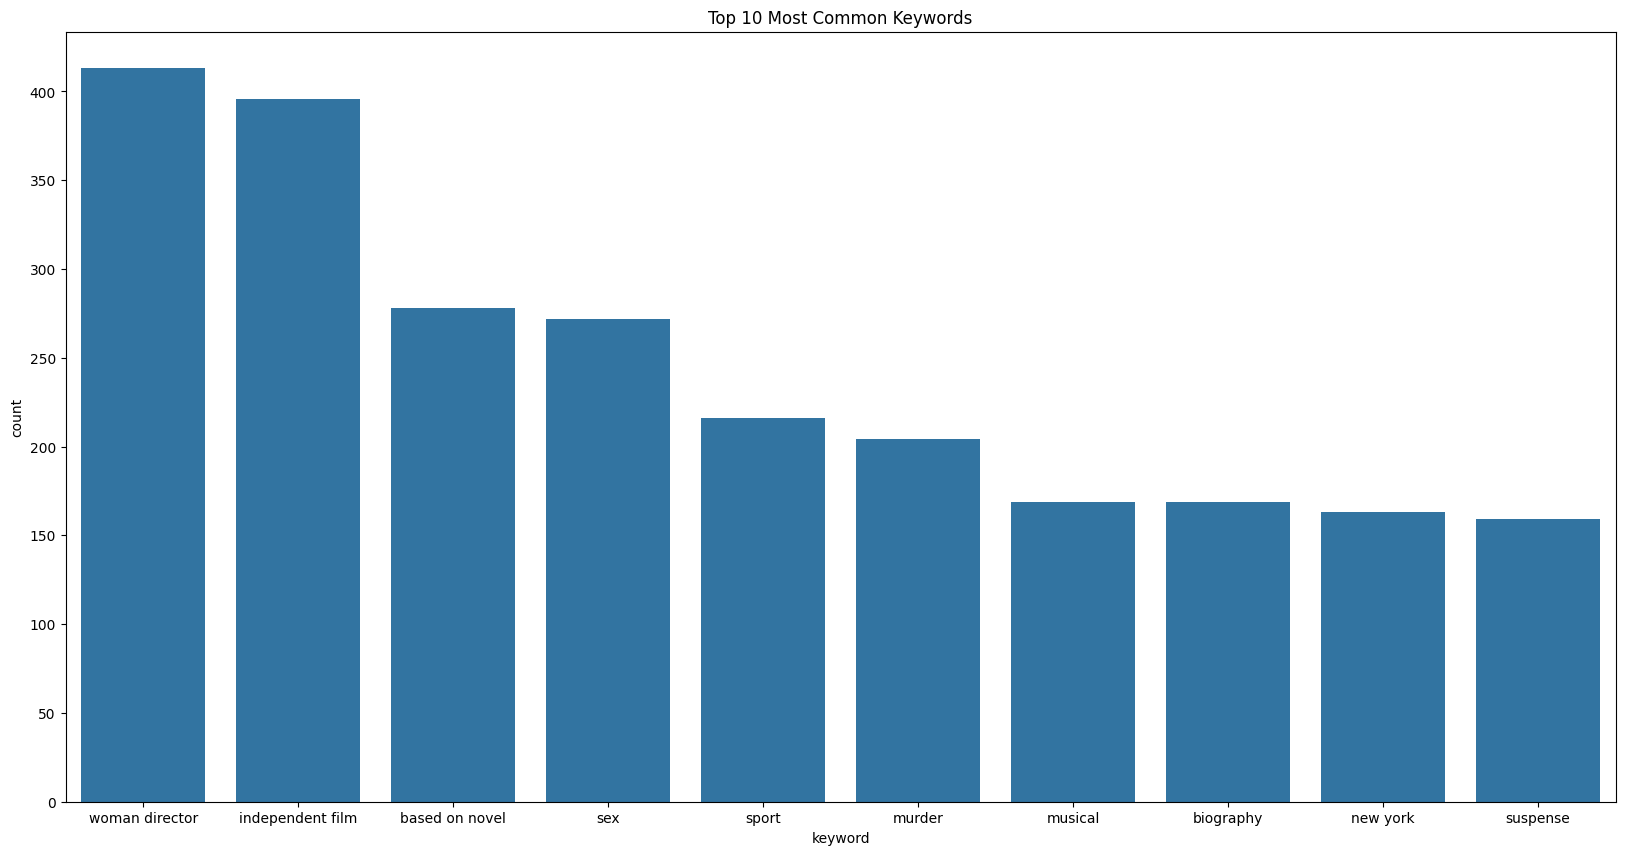

In [ ]:
# Plot the top 10 most common keywords
top_keywords = keyword_counts_df.head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x='keyword', y='count', data=top_keywords)
plt.title('Top 10 Most Common Keywords')
plt.show()

####2.4 Budget vs Revenue

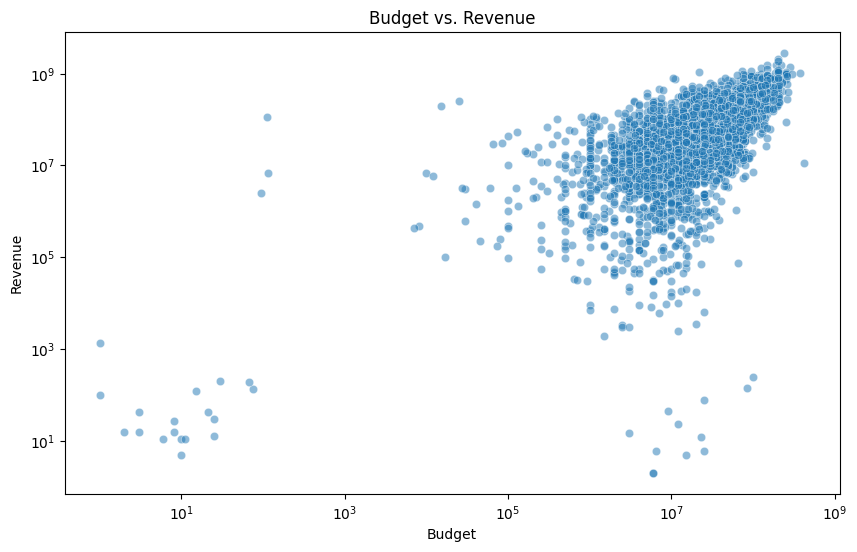

In [ ]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')  #Using log scale for better visualization
plt.yscale('log')
plt.show()

In [ ]:
# Define success based on revenue (top 20% by revenue)
revenue_threshold = df['revenue'].quantile(0.80)
df['is_successful'] = df['revenue'] > revenue_threshold

In [ ]:
# Filter high-performing movies
high_performing_movies = df[(df['is_successful']) & (df['vote_average'] > df['vote_average'].median())]
# Calculate average characteristics for high-performing movies
high_performance_summary = high_performing_movies[['budget', 'popularity', 'runtime', 'vote_average']].mean()

print("Characteristics of High-Performing Movies:")
print(high_performance_summary)

Characteristics of High-Performing Movies:
budget          5.474093e+07
popularity      2.028941e+00
runtime         1.179377e+02
vote_average    6.735328e+00
dtype: float64


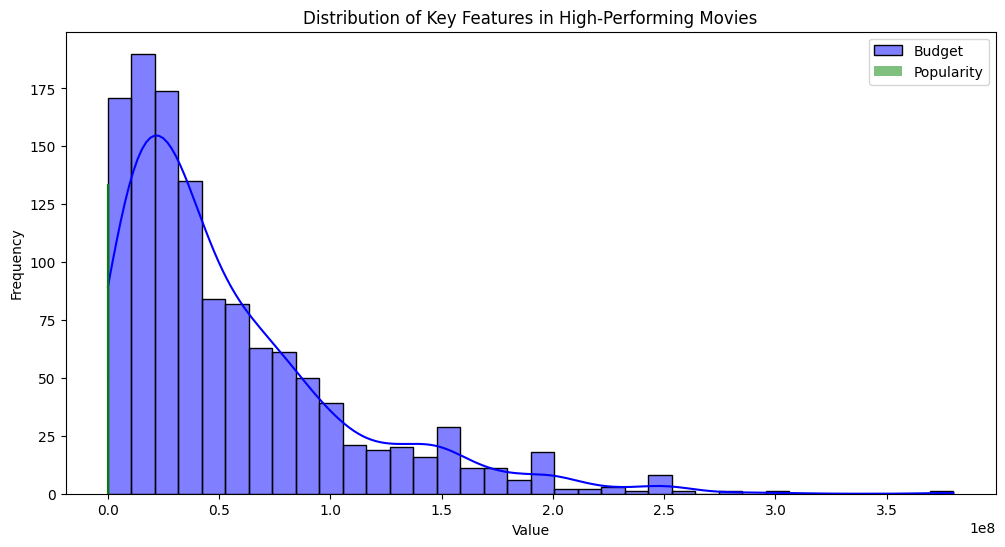

In [ ]:
# Plot distribution of key features for high-performing movies
plt.figure(figsize=(12, 6))
sns.histplot(high_performing_movies['budget'], kde=True, color='blue', label='Budget')
sns.histplot(high_performing_movies['popularity'], kde=True, color='green', label='Popularity')
plt.title('Distribution of Key Features in High-Performing Movies')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#3. Popularity and Ratings

####3.1 Factors Influencing Popularity

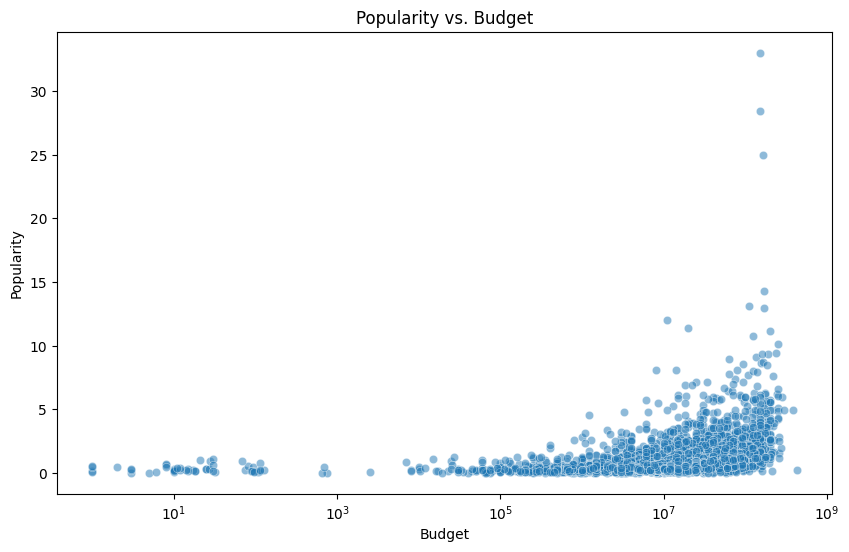

In [ ]:
# 1-Popularity vs. Budget:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='popularity', alpha=0.5)
plt.title('Popularity vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.xscale('log')
plt.show()

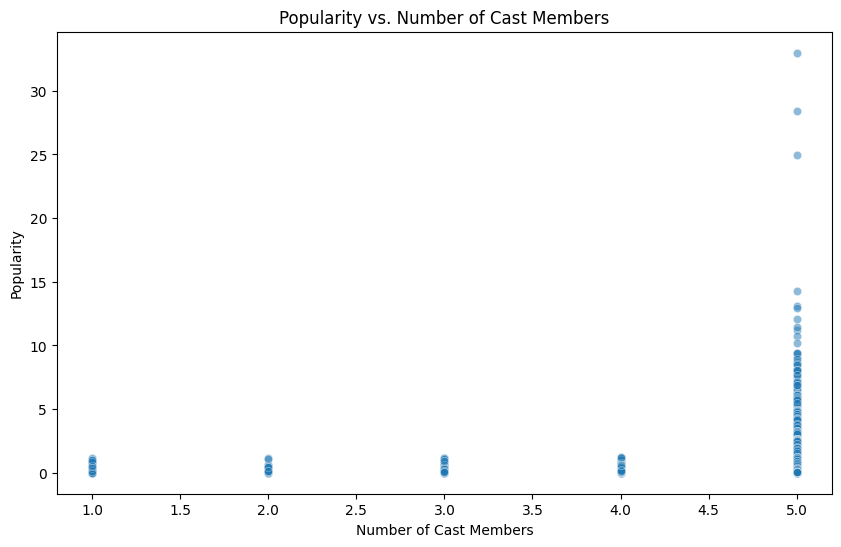

In [ ]:
# 2-Popularity vs. Cast:
df['cast_length'] = df['cast'].apply(lambda x: len(x.split('|')))           # Assuming 'cast' column is a string of names

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cast_length', y='popularity', alpha=0.5)
plt.title('Popularity vs. Number of Cast Members')
plt.xlabel('Number of Cast Members')
plt.ylabel('Popularity')
plt.show()

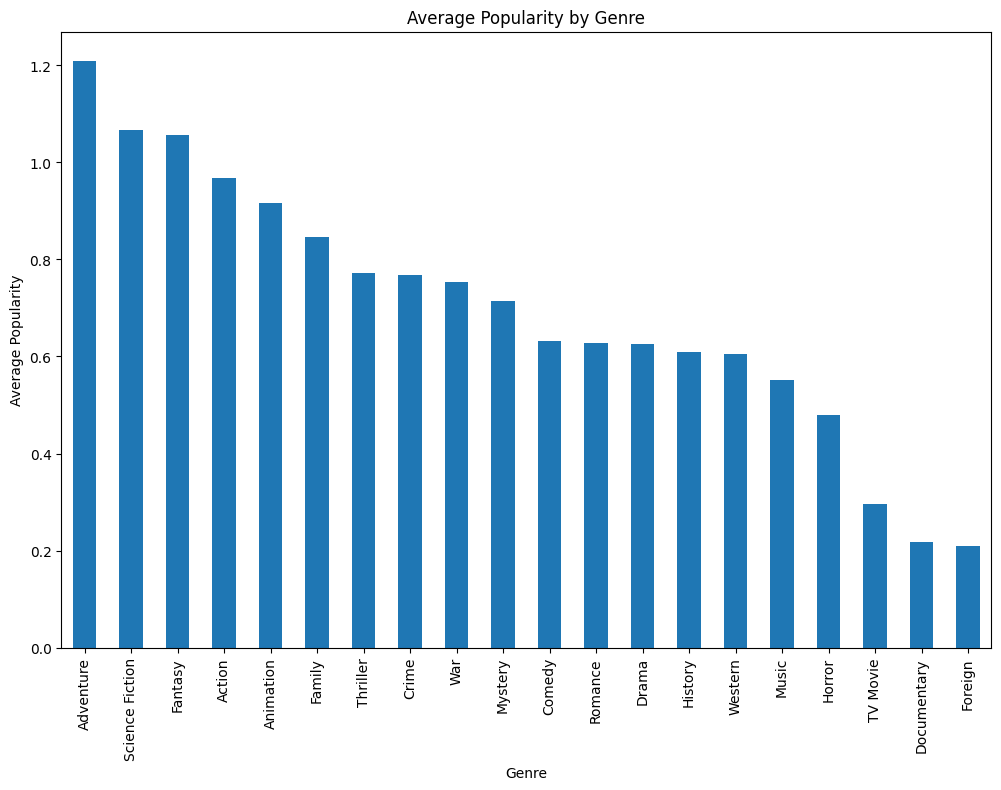

In [ ]:
# 3-Popularity vs. Genres:
genre_popularity = df_exploded.groupby('genres_list')['popularity'].mean().sort_values(ascending=False)          # Calculate average popularity by genre

plt.figure(figsize=(12, 8))
genre_popularity.plot(kind='bar')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

####3.2 Rating Analysis

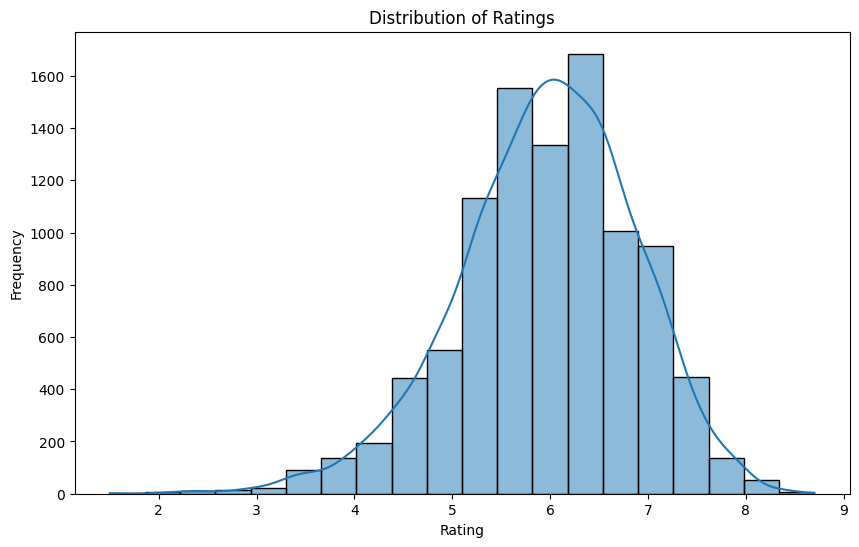

In [ ]:
# 1-Distribution of Ratings:
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

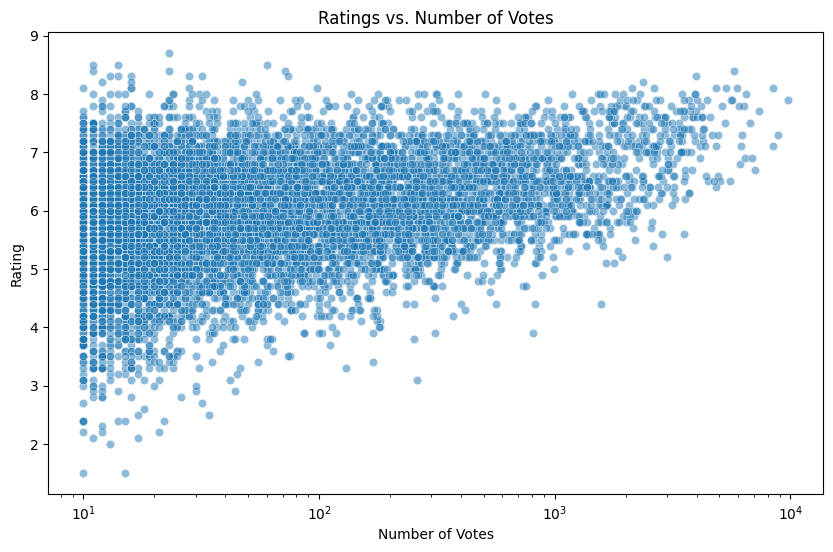

In [ ]:
# 2-Correlation Between Ratings and Number of Votes:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_count', y='vote_average', alpha=0.5)
plt.title('Ratings vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

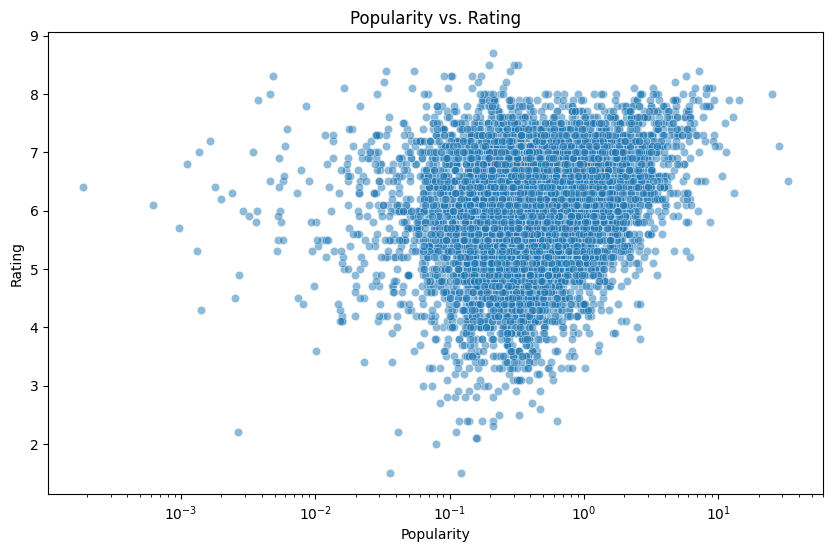

In [ ]:
# 3-Correlation Between Ratings and Popularity:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.5)
plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.xscale('log')  # Optional: Use log scale for better visualization
plt.show()

#4. Genre and Content Analysis

####4.1 Genre Distribution

In [ ]:
# 1-Explode the Genre Column:

df['genres_list'] = df['genres'].apply(lambda x: x.split('|'))        # Split genres into lists

df_exploded_genres = df.explode('genres_list')                   # Explode genres to have one genre per row

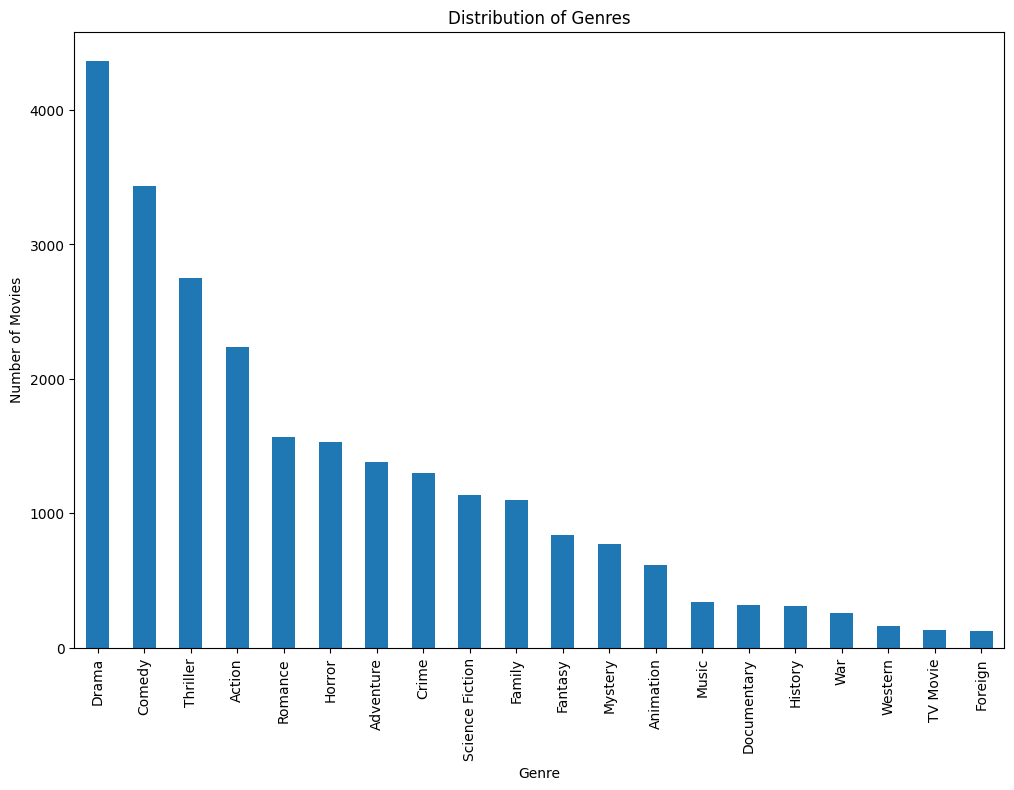

In [ ]:
genre_counts = df_exploded_genres['genres_list'].value_counts()         # Calculate genre counts

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


#### 4.2 Runtime by Genre

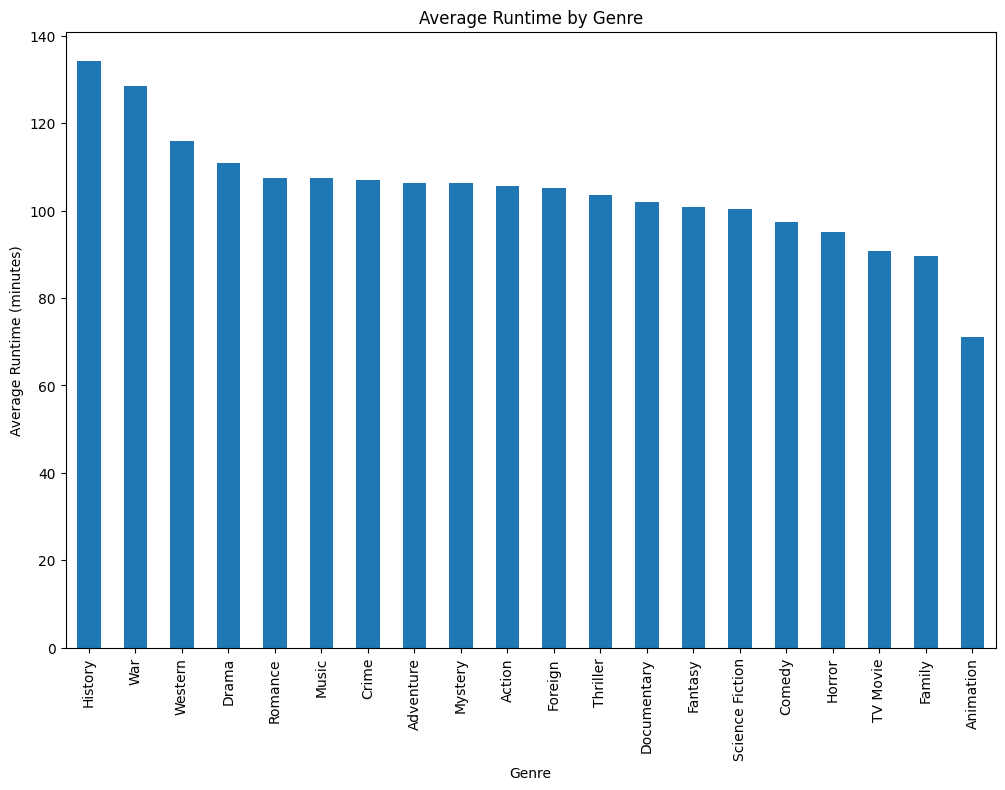

In [ ]:
genre_runtime = df_exploded_genres.groupby('genres_list')['runtime'].mean().sort_values(ascending=False)     # Calculate average runtime by genre

plt.figure(figsize=(12, 8))
genre_runtime.plot(kind='bar')
plt.title('Average Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=90)
plt.show()

#5. Director and Cast Influence


####5.1 Top Directors

In [ ]:
# Calculate Average Ratings and Revenue by Director:
director_stats = df.groupby('director').agg(average_rating=('vote_average', 'mean'), total_revenue=('revenue', 'sum') ).reset_index()       # Group by director and calculate average ratings and revenue

# Sort by average rating and revenue
top_directors_by_rating = director_stats.sort_values(by='average_rating', ascending=False).head(10)
top_directors_by_revenue = director_stats.sort_values(by='total_revenue', ascending=False).head(10)

print("Top Directors by Average Rating:")
print(top_directors_by_rating)

print("\nTop Directors by Total Revenue:")
print(top_directors_by_revenue)

Top Directors by Average Rating:
                                  director  average_rating  total_revenue
1004                          David Mallet             8.7              0
2819  Martin Scorsese|Michael Henry Wilson             8.5              0
3841                          Saul Swimmer             8.5              0
822                            Curt Morgan             8.5              0
2283                Jorge RamÃ­rez SuÃ¡rez             8.4              0
3793                Sam Dunn|Scot McFadyen             8.3              0
1067                          Dean Wellins             8.3              0
762                        Claude Lanzmann             8.3              0
19                             Adam Curtis             8.3              0
843                        Damien Chazelle             8.2       13993093

Top Directors by Total Revenue:
               director  average_rating  total_revenue
4094   Steven Spielberg        6.824138     9018563772
3374      

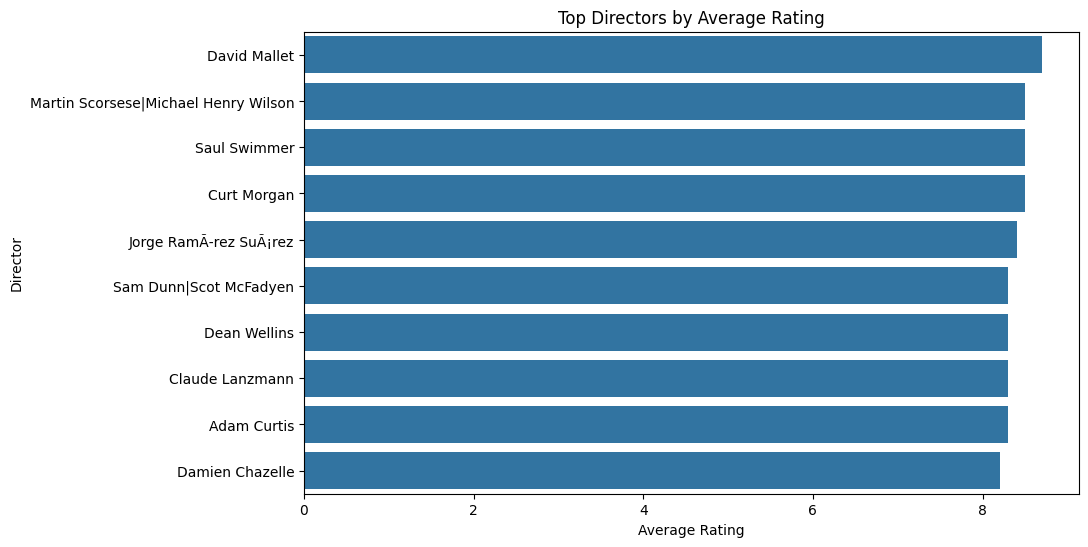

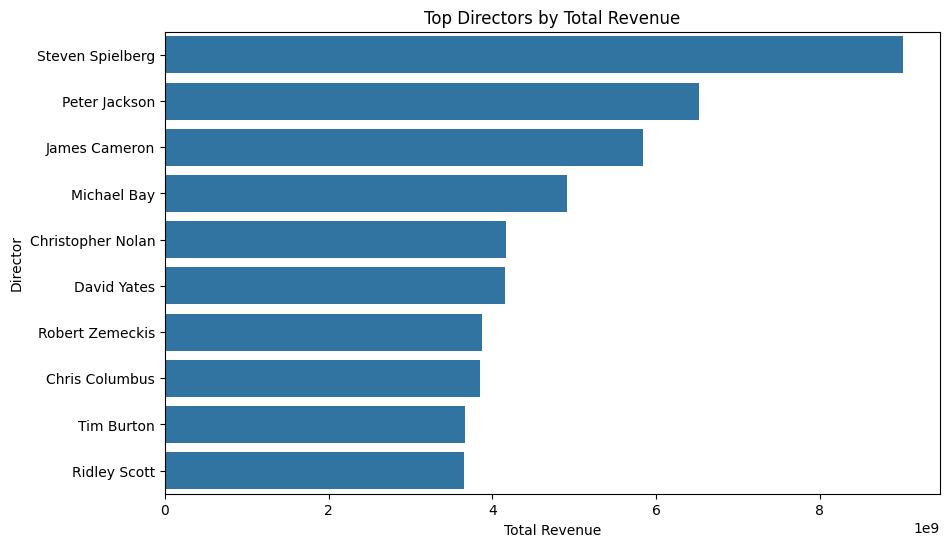

In [ ]:
# Visualize the Results:
# Plot top directors by average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=top_directors_by_rating, x='average_rating', y='director')
plt.title('Top Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

# Plot top directors by total revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_directors_by_revenue, x='total_revenue', y='director')
plt.title('Top Directors by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Director')
plt.show()

####5.2 Actor Impact

In [ ]:
# Analyze Cast Members:

df['cast_list'] = df['cast'].apply(lambda x: x.split('|'))
df_exploded_cast = df.explode('cast_list')

# Calculate average revenue and rating by actor
actor_revenue = df_exploded_cast.groupby('cast_list')['revenue'].mean().sort_values(ascending=False)
actor_rating = df_exploded_cast.groupby('cast_list')['vote_average'].mean().sort_values(ascending=False)

print("Actors by Average Revenue:")
print(actor_revenue.head(10))

print("\nActors by Average Rating:")
print(actor_rating.head(10))

Actors by Average Revenue:
cast_list
Daisy Ridley          2.068178e+09
Santino Fontana       1.274219e+09
Bob Peck              9.201000e+08
Robert MacNaughton    7.929106e+08
Rosemary Harris       7.837663e+08
Richard Armitage      7.727814e+08
Isobelle Molloy       7.584104e+08
Nick Robinson         7.567644e+08
Helmut Bakaitis       7.385997e+08
Phaldut Sharma        7.163927e+08
Name: revenue, dtype: float64

Actors by Average Rating:
cast_list
Sam Brown         8.7
Nick Mason        8.7
David Gilmour     8.7
Richard Wright    8.7
Jon Carin         8.7
Mark Landvik      8.5
Jake Blauvelt     8.5
Travis Rice       8.5
Frank Capra       8.5
Brian De Palma    8.5
Name: vote_average, dtype: float64


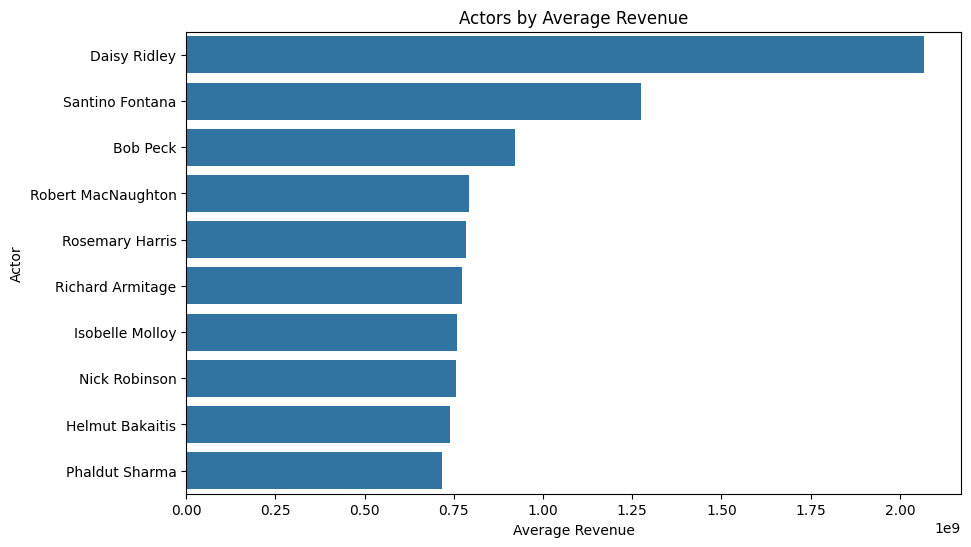

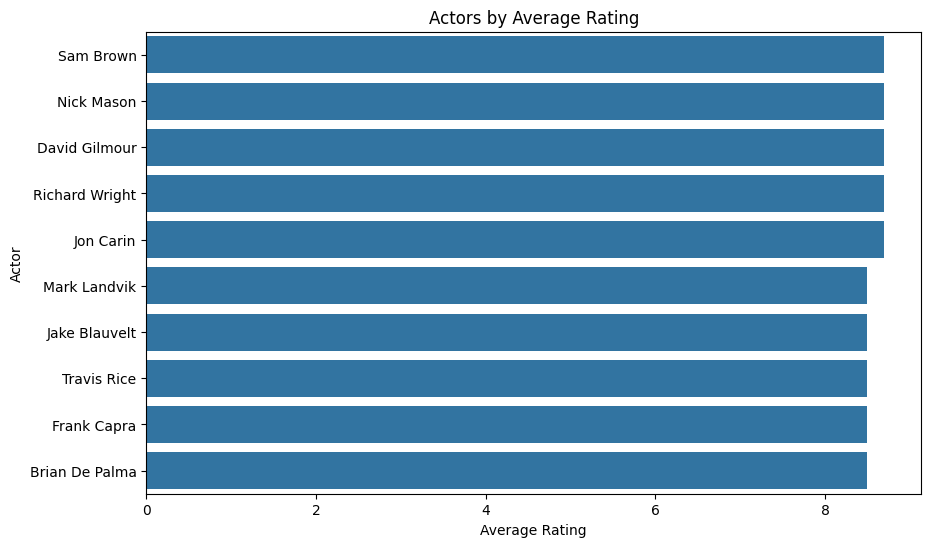

In [ ]:
# Visualize the Results:
plt.figure(figsize=(10, 6))
sns.barplot(y=actor_revenue.head(10).index, x=actor_revenue.head(10).values)
plt.title('Actors by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Actor')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(y=actor_rating.head(10).index, x=actor_rating.head(10).values)
plt.title('Actors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.show()

#6. Temporal Trends

####6.1 Yearly Trends

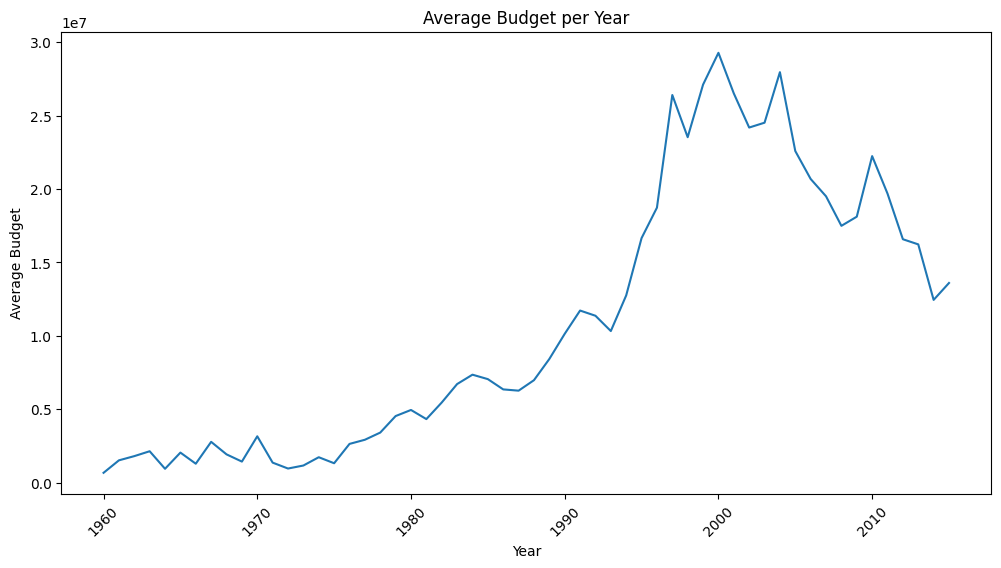

In [ ]:
# 1-Yearly Budget Trends:
yearly_budget = df.groupby('release_year')['budget'].mean()           # Calculate average budget by year

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_budget.index, y=yearly_budget.values)
plt.title('Average Budget per Year')
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.xticks(rotation=45)
plt.show()

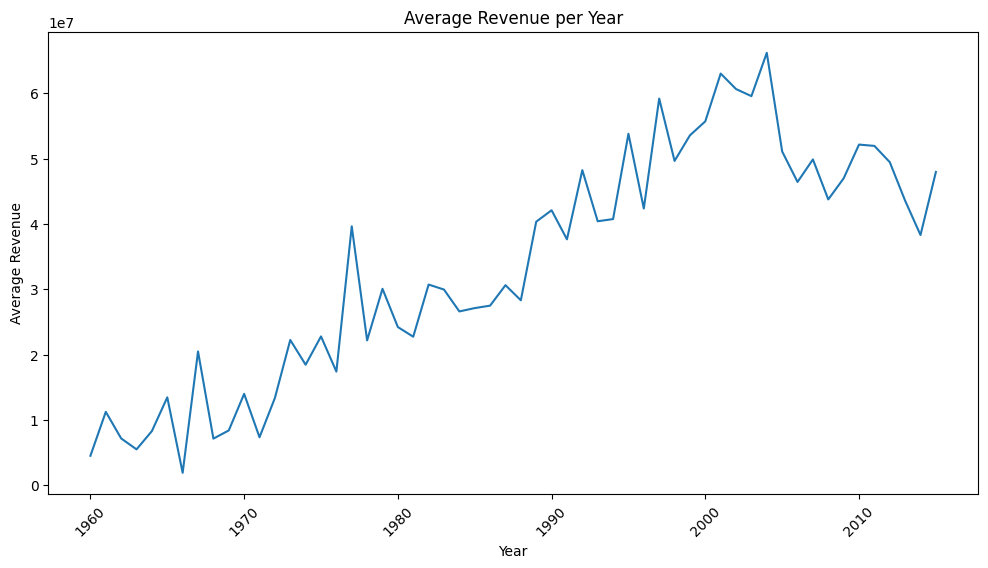

In [ ]:
# 2-Yearly Revenue Trends:
yearly_revenue = df.groupby('release_year')['revenue'].mean()        # Calculate average revenue per year

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

####6.2 Genre Popularity Over Time

<Figure size 1000x600 with 0 Axes>

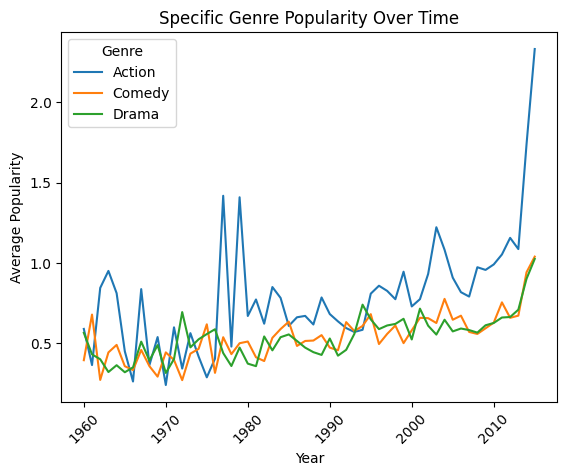

In [ ]:
#Analyze Specific Genres:
genre_popularity_yearly = df_exploded_genres.groupby(['release_year', 'genres_list'])['popularity'].mean().unstack()       # Explode genres and group by year and genre

genres_to_analyze = ['Action', 'Comedy', 'Drama']            #Filter for specific genres
filtered_genre_popularity_yearly = genre_popularity_yearly[genres_to_analyze]

plt.figure(figsize=(10, 6))
filtered_genre_popularity_yearly.plot()
plt.title('Specific Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

#7. Market Dynamics

####7.1 Release Month Analysis

In [ ]:
# 1-Extract Month from Release Date:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')         # Convert release_date to datetime
df['release_month'] = df['release_date'].dt.month

<ipython-input-57-727150eaad75>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')         # Convert release_date to datetime


Text(0, 0.5, 'Number of Releases')

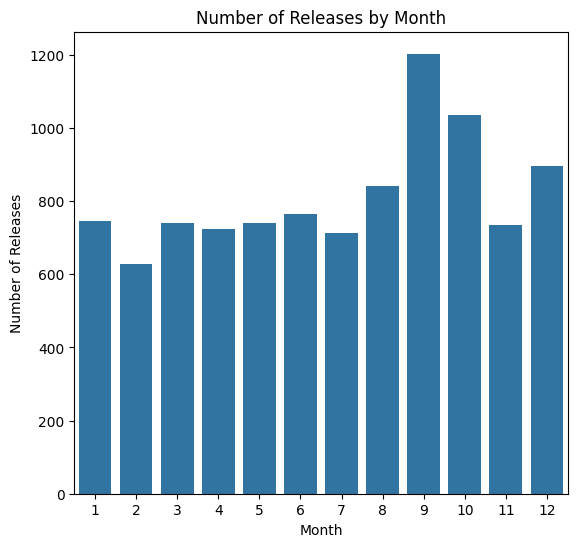

In [ ]:
# 2-Count of releases by month
releases_by_month = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=releases_by_month.index, y=releases_by_month.values)
plt.title('Number of Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')

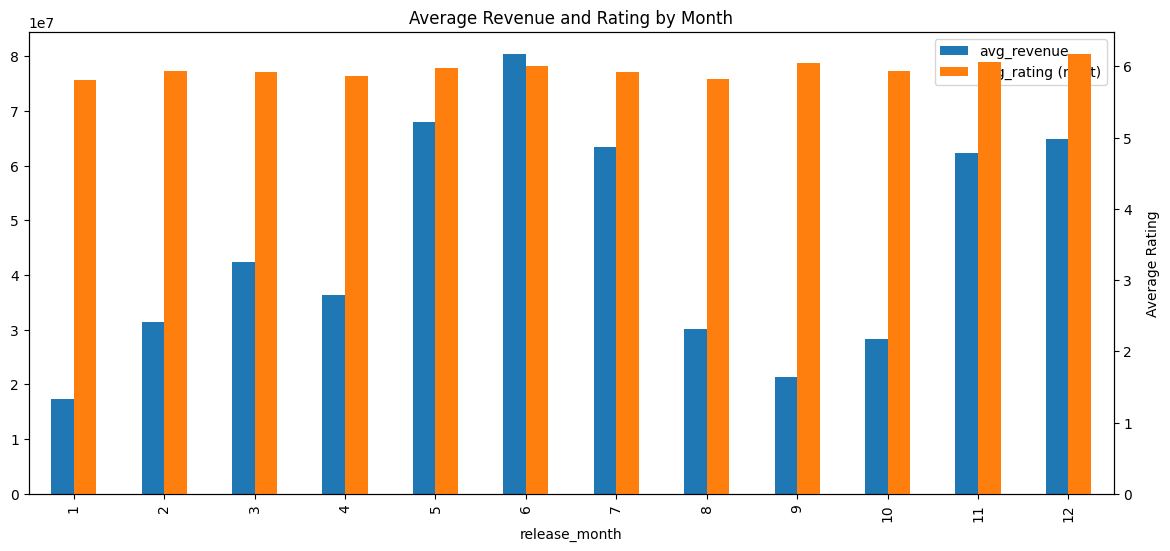

In [ ]:
# Average revenue and rating by month
monthly_performance = df.groupby('release_month').agg(avg_revenue=('revenue', 'mean'), avg_rating=('vote_average', 'mean'), count=('id', 'size'))

monthly_performance[['avg_revenue', 'avg_rating']].plot(kind='bar', secondary_y='avg_rating', figsize=(14, 6))
plt.title('Average Revenue and Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.ylabel('Average Rating', labelpad=10)
plt.show()

####7.2 Sequels vs. Standalone

In [ ]:
# Define a function to identify sequels based on title
def is_sequel(title):
    sequel_keywords = ['2', 'III', 'Chapter', 'Part']
    return any(keyword in title for keyword in sequel_keywords)

df['is_sequel'] = df['original_title'].apply(is_sequel)

Performance Comparison (Sequels vs. Standalone):
            avg_revenue  avg_rating  count
is_sequel                                 
False      4.273841e+07    5.975746   9384
True       8.054544e+07    5.661240    387


<Figure size 1000x600 with 0 Axes>

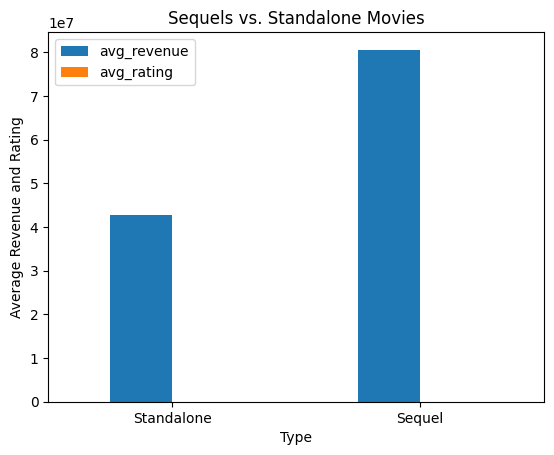

In [ ]:
# Calculate average revenue and rating for sequels vs. standalone movies
sequel_performance = df.groupby('is_sequel').agg(avg_revenue=('revenue', 'mean'), avg_rating=('vote_average', 'mean'), count=('id', 'size'))
print("Performance Comparison (Sequels vs. Standalone):")
print(sequel_performance)

plt.figure(figsize=(10, 6))
sequel_performance[['avg_revenue', 'avg_rating']].plot(kind='bar')
plt.title('Sequels vs. Standalone Movies')
plt.xlabel('Type')
plt.ylabel('Average Revenue and Rating')
plt.xticks(ticks=[0, 1], labels=['Standalone', 'Sequel'], rotation=0)
plt.show()

#9. Conclusion


- The analysis revealed that higher budgets generally lead to higher revenues, but the profitability depends heavily on the genre and cast.

- Understanding these patterns can help in making informed decisions in movie production and marketing.

- Further analysis could explore other years or compare different markets.

#10. Future Work



- Expand analysis to include more years and compare trends.
- Explore the impact of marketing and release timing on movie success.
- Analyze viewer demographics and preferences for a deeper understanding of movie popularity.